## This script updates human scores to make it in line with metrics inputs, processes metrc scores, and visualises human sys score distributions, saves outlier systems into a dictionary



In [2]:

import pandas as pd
import sys
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; 
import numpy as np
 
import shutil
import os

from outliers import is_outlier, rescale

In [5]:

""" PROCESS SUBMISSIONS
if missing, compute submitted metric sys and doc scores as avg seg scores"""

 
import pandas as pd
import sys
import argparse
import glob 
import shutil
import os




cols = ['metric', 'lp', 'testset','refset','SYSTEM', 'docid','segid', 'score'] 
metricspath=f'../submissions-as-received'  
output_dir=f'../final-metric-scores/submissions/'
covidpath=f'../testsuite-scores/covid/'
legalpath=f'../testsuite-scores/legal/'

os.makedirs(output_dir, exist_ok=True)
os.makedirs(covidpath, exist_ok=True)
os.makedirs(legalpath, exist_ok=True)


for fn in sorted(glob.glob(metricspath + '/*.seg.*gz')):
    basename = fn.split('/')[-1]
    
    #copy seg file
    shutil.copy2(fn, os.path.join(output_dir, basename))

    sys_fn =basename.replace('seg.sc','sys.sc')
    doc_fn = basename.replace('seg.sc','doc.sc')

    metric_df = pd.read_csv(fn, sep='\t',header=None)    
    if len(metric_df.columns) != len(cols ): 
        print("!",fn)
        continue

    metric_df.columns = cols   
    metric=metric_df.metric[0]
    
    print(fn, metric)
    news = metric_df[metric_df.testset  == 'newstest2020']
    
    if os.path.isfile(os.path.join(metricspath, sys_fn)):    
        shutil.copy2(os.path.join(metricspath, sys_fn), os.path.join(output_dir, sys_fn))
    else:
        print('    computing sys')
        
        sys  = news.groupby(['metric','lp','testset','refset', 'SYSTEM']).score.mean()
        sys.to_csv( os.path.join(output_dir, sys_fn),compression='gzip', header = False, index =True, sep='\t')

    if os.path.isfile(os.path.join(metricspath, doc_fn)):
        shutil.copy2(os.path.join(metricspath, doc_fn), os.path.join(output_dir, doc_fn))
    else:
        print('    computing doc')
        
        doc = news.groupby(['metric','lp','testset','refset', 'SYSTEM', 'docid']).score.mean()
        doc.to_csv( os.path.join(output_dir, doc_fn),compression='gzip', header = False, index =True, sep='\t')
     
    
#     #extract testsuites
#     ts = metric_df[metric_df.testset  != 'newstest2020']
#     if len(ts) == 0:
#         continue
#     covid_ts = ts[ts.docid.str.startswith('testsuite-covid')]
#     legal_ts = ts[~ts.docid.str.startswith('testsuite-covid')]
    
#     covid_ts.to_csv(os.path.join(covidpath, basename),compression='gzip', header=False, index=False, sep='\t')
#     legal_ts.to_csv(os.path.join(legalpath, basename),compression='gzip', header=False, index=False, sep='\t')
    
#     sys  = covid_ts.groupby(['metric','lp','testset','refset', 'SYSTEM']).score.mean()
#     sys.to_csv(os.path.join(covidpath, sys_fn),compression='gzip', header = False, index =True, sep='\t')

#     sys  = legal_ts.groupby(['metric','lp','testset','refset', 'SYSTEM']).score.mean()
#     sys.to_csv(os.path.join(legalpath, sys_fn),compression='gzip', header = False, index =True, sep='\t')
      

../submissions-as-received/BAQ_dyn.seg.score.gz BAQ_dyn
    computing sys
    computing doc
../submissions-as-received/BAQ_static.seg.score.gz BAQ_static
    computing sys
    computing doc
../submissions-as-received/BERT-base-L2.seg.score.gz BERT-base-L2
../submissions-as-received/BERT-large-L2.seg.score.gz BERT-large-L2
../submissions-as-received/BLEURT-extended.seg.score.gz BLEURT-extended
../submissions-as-received/BLEURT.seg.score.gz BLEURT
../submissions-as-received/COMET-2R.seg.score.gz COMET-2R
    computing doc
../submissions-as-received/COMET-HTER.seg.score.gz COMET-HTER
../submissions-as-received/COMET-MQM.seg.score.gz COMET-MQM
../submissions-as-received/COMET-QE.seg.score.gz COMET-QE
    computing doc
../submissions-as-received/COMET-Rank.seg.score.gz COMET-Rank
    computing doc
../submissions-as-received/COMET.seg.score.gz COMET
../submissions-as-received/CharacTER.seg.score.gz CharacTER
../submissions-as-received/EED.seg.score.gz EED
../submissions-as-received/EQ_dyn.se

In [4]:
"""PROCESS BASELINES 
if missing, compute baseline metric sys and doc scores as avg seg scores"""

cols = ['metric', 'lp', 'testset','refset','SYSTEM', 'docid','segid', 'score'] 
metricspath=f'../baselines-computed'  
output_dir=f'../final-metric-scores/baselines/' 

os.makedirs(output_dir, exist_ok=True) 

for fn in sorted(glob.glob(metricspath + '/*.seg.*gz')):
    basename = fn.split('/')[-1]
    
    #copy seg file
    shutil.copy2(fn, os.path.join(output_dir, basename))

    sys_fn =basename.replace('seg.sc','sys.sc')
    doc_fn = basename.replace('seg.sc','doc.sc')

    metric_df = pd.read_csv(fn, sep='\t',header=None)    
    if len(metric_df.columns) != len(cols ): 
        print("!",fn)
        continue

    metric_df.columns = cols   
    metric=metric_df.metric[0]
    
    print(fn, metric)
    news = metric_df[metric_df.testset  == 'newstest2020']
    
    if os.path.isfile(os.path.join(metricspath, sys_fn)):    
        shutil.copy2(os.path.join(metricspath, sys_fn), os.path.join(output_dir, sys_fn))
    else:
        print('    computing sys')
        
        sys  = news.groupby(['metric','lp','testset','refset', 'SYSTEM']).score.mean()
        sys.to_csv( os.path.join(output_dir, sys_fn),compression='gzip', header = False, index =True, sep='\t')

    if os.path.isfile(os.path.join(metricspath, doc_fn)):
        shutil.copy2(os.path.join(metricspath, doc_fn), os.path.join(output_dir, doc_fn))
    else:
        print('    computing doc')
        
        doc = news.groupby(['metric','lp','testset','refset', 'SYSTEM', 'docid']).score.mean()
        doc.to_csv( os.path.join(output_dir, doc_fn),compression='gzip', header = False, index =True, sep='\t')

        


ls: cannot access 'ffdf': No such file or directory


In [12]:
# # !ls '{metricspath}/' 
!cp '{metricspath}/BLEU.sys.score.gz' '{output_dir}/BLEU.sys.score.gz' 
!ls f'{output_dir}/' 


In [41]:
#negate TER scores 

metricspath=f'../final-metric-scores/baselines/TER.*.gz'  

for fn in sorted(glob.glob(metricspath)): 
    print(fn)
    metric_df = pd.read_csv(fn, sep='\t',header=None)    
    sc = metric_df.columns[-1]
    metric_df[0] = 'TER'   
#     metric_df[sc] = -1* metric_df[sc]
    display(metric_df.head())
    metric_df.to_csv(fn.replace('ter','TER'), compression='gzip',sep='\t', header=None, index=False)

../final-metric-scores/baselines/TER.doc.score.gz


,0,1,2,3,4,5,6
0,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,aktualne.cz.100069,-0.589330
1,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,aktualne.cz.100070,-0.601129
2,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,aktualne.cz.100080,-0.586375
3,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,aktualne.cz.100085,-0.524760
4,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,aktualne.cz.100094,-0.532900


../final-metric-scores/baselines/TER.seg.score.gz


,0,1,2,3,4,5,6,7
0,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,novinky.cz.121062,1,-0.3333
1,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,novinky.cz.121062,2,-0.2857
2,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,novinky.cz.121062,3,-0.6116
3,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,novinky.cz.121062,4,-0.4322
4,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,novinky.cz.121062,5,-0.5484


../final-metric-scores/baselines/TER.sys.score.gz


,0,1,2,3,4,5
0,TER,cs-en,newstest2020,newstest2020,CUNI-DocTransformer.1457,-0.5532
1,TER,cs-en,newstest2020,newstest2020,CUNI-T2T-2018.1072,-0.5857
2,TER,cs-en,newstest2020,newstest2020,CUNI-Transformer.1081,-0.5596
3,TER,cs-en,newstest2020,newstest2020,Online-A.1570,-0.5824
4,TER,cs-en,newstest2020,newstest2020,Online-B.1586,-0.5625


In [44]:
# sacrebleu doesn't support multiple refs for chrF 
# so delete newstestM2020 scores that are actually computed over only one ref

metricspath=f'../final-metric-scores/baselines/chrF.*.gz'  

for fn in sorted(glob.glob(metricspath)): 
    print(fn)
    metric_df = pd.read_csv(fn, sep='\t',header=None)    
    metric_df = metric_df[metric_df[3] != 'newstestM2020']
    print(metric_df[3].unique())
    metric_df.to_csv(fn, compression='gzip',sep='\t', header=None, index=False)

../final-metric-scores/baselines/chrF.doc.score.gz
['newstest2020' 'newstestB2020' 'newstestP2020']
../final-metric-scores/baselines/chrF.seg.score.gz
['newstest2020' 'newstestB2020' 'newstestP2020']
../final-metric-scores/baselines/chrF.sys.score.gz
['newstest2020' 'newstestB2020' 'newstestP2020']


In [6]:
#PROCESS HUMAN SEG SCORES

#MAKE SEG IDS CONSISTENT TO BE DOCID:LINENUMINDOC
#RENAME SOME SYS TO BE CONSISTENT WITH HUMAN

from scipy.stats import pearsonr
import pandas as pd
import sys
import argparse
import glob
import matplotlib.pyplot as plt
import random
%matplotlib inline

INPUTDIR = '../manual-evaluation/DA'

langs=['cs', 'de','iu', 'ja','pl','ru','ta','zh']    
ALL_LPS = [f'{l}-en' for l in langs]
ALL_LPS.extend( ['km-en','ps-en'])
ALL_LPS.extend( [f'en-{l}' for l in langs])

all_scores = {}
for lp in ALL_LPS:
    human_scores = pd.read_csv(f'{INPUTDIR}/ad-seg-scores-{lp}.csv',  sep=' ')
    
    
    
    ########### housekeeping ################

      #inconsistencies between system name in the filenames and human evaluation. 
      #         We update system names in human eval  
    if lp=='iu-en':
        human_scores=human_scores.replace(['NICT-Kyoto.1220', 'UQAM-TanLe.520', 'Facebook-AI.729'],
                                     ['NICT_Kyoto.1220', 'UQAM_TanLe.520', 'Facebook_AI.729'])
    if lp=='ps-en':
        human_scores=human_scores.replace(['Huoshan-Translate.1470', 'Huawei-TSC.1533' ],
                                     ['Huoshan_Translate.1470', 'Huawei_TSC.1533' ])
    if lp=='km-en':
        human_scores=human_scores.replace(['Huawei-TSC.1539' , 'Huoshan-Translate.651'],
                                     ['Huawei_TSC.1539', 'Huoshan_Translate.651'])
                
    if lp=='en-iu':
        human_scores=human_scores[human_scores.SYS != 'zlabs-nlp.49']
        
    del human_scores['Unnamed: 5']        
    
    #for to-en lps, human translation evaluated in the human eval is the newstestB2020 reference;
    # which we named as Human-B.0 in the metrics inputs
    human_scores=human_scores.replace(['HUMAN.0' ],
                                     ['Human-B.0' ])
    
    #en-to lps
    human_scores=human_scores.replace(['HUMAN' ],
                                     ['Human-A.0' ])

    #en-to lps with mref                  
    #renaming HUMAN-A, HUMAN-B and HUMAN-C to be consistent with the system names in metrics inputs
    human_scores=human_scores.replace(['HUMAN-A' ],
                                     ['Human-A.0' ])
    
    human_scores=human_scores.replace(['HUMAN-B' ],
                                     ['Human-B.0' ])

    human_scores=human_scores.replace(['HUMAN-C' ],
                                     ['Human-P.0' ])    
     

    ########### housekeeping ################
    
    
    dets = pd.read_csv(f'../input/details/{lp}.txt', header=None, sep = '\t')
    dets.columns =  ['SID', 'TESTSET', 'LP', 'DOCID', 'SEGID']
    
    sid_dict = {s:(d,ds) for s,d,ds in zip(dets.SID, dets.DOCID, dets.SEGID)}
    sid_dict_reversed = {(d,ds):s for s,d,ds in zip(dets.SID, dets.DOCID, dets.SEGID)}
#     print(lp, len(human_scores))

    if lp.endswith('en'):
        human_scores['SEGID'] = [f'{sid_dict[s][0]}::{sid_dict[s][1]}'  for s in human_scores.SID]
    else:
        human_scores['SEGID'] = [s.replace('_', '::')  for s in human_scores.SID]
        human_scores['SID'] = [ sid_dict_reversed["_".join(s.split('_')[:-1]), int(s.split('_')[-1]) + 1 ]   for s in human_scores.SID]
        human_scores['SEGID'] = [f'{sid_dict[s][0]}::{sid_dict[s][1]}'  for s in human_scores.SID]
 

    human_scores = human_scores[['SYS','SEGID', 'RAW.SCR', 'Z.SCR', 'N', 'SID']] 
    human_scores.to_csv(f'{INPUTDIR}/metrics-ad-seg-scores-{lp}.csv',  sep=' ', index=False) 
    
    human_scores['DOCID'] = [s.split('::')[0] for s in human_scores.SEGID]
    human_scores =human_scores[['SYS', 'SEGID','DOCID', 'RAW.SCR', 'Z.SCR', 'N', 'SID']]
    
    all_scores[lp] = pd.DataFrame.from_dict({'LP':lp,
                                             'SEGID': human_scores['SEGID'], 
                                             'DOCID': human_scores['DOCID'], 
                                             'SYS': human_scores['SYS'],  
                                             'N': human_scores['N'], 
                                             'HUMAN': human_scores['Z.SCR'],
                                             'HUMAN_RAW': human_scores['RAW.SCR'],
                                             'SID': human_scores['SID'] 
                                            }) 
    human_scores['ID'] =  [f'{sys}::{ds}' for sys,  ds in zip( human_scores.SYS,  human_scores.SEGID)]


cs-en 7532
de-en 9389
iu-en 13226
ja-en 8940
pl-en 11822
ru-en 10823
ta-en 7578
zh-en 29248
km-en 7455
ps-en 7989
en-cs 15740
en-de 11360
en-iu 10643
en-ja 10295
en-pl 11164
en-ru 11925
en-ta 8408
en-zh 17168


In [ ]:
#  DOC SCORES
#compute as avg seg scores, and write csv in same format as seg scores

print('\\begin{tabular}')
print('\\toprule')
print('T', 5, 10, 15, 20, sep='  &  ')
print('\\midrule')

for lp in all_scores:    
    df  = all_scores[lp] 
    
    docscores = df.groupby(['SYS','DOCID']).agg({ 'HUMAN_RAW':'mean','HUMAN':'mean', 'N':'sum', 'SEGID':'count'})
    docscores.columns =   ['RAW.SCR', 'Z.SCR','N.ALL',  'N']  
     
 
    docscores = docscores.reset_index() 
    docscores['SEGID'] =  docscores.DOCID 
     
    docscores = docscores['SYS SEGID RAW.SCR Z.SCR N'.split()]
   



    docscores.to_csv(f'{INPUTDIR}/metrics-ad-doc-scores-{lp}.csv', sep=' ', index=False)  

cs-en ; 12 systems ; outliers_z: [] ; outliers_raw: []


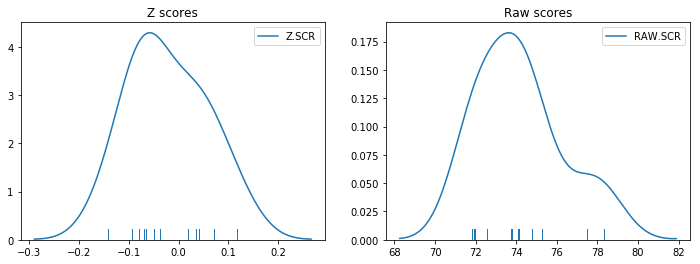

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,6,78.306039,0.117873,632,CUNI-DocTransformer.1457,949,1.925030,False,2.170642,False
1,1,77.504675,0.071084,615,OPPO.1481,845,1.364831,False,1.771274,False
2,5,74.785353,0.041433,623,Online-B.1586,937,1.009829,False,0.416069,False
3,8,75.254992,0.034385,601,CUNI-Transformer.1081,846,0.925452,False,0.650119,False
4,0,73.794391,0.018178,627,Online-A.1570,877,0.731406,False,0.077788,False
5,9,73.746250,-0.036716,640,SRPOL.1365,1016,0.074170,False,0.101780,False
6,11,74.106566,-0.049106,632,UEDIN-CUNI.1359,862,0.074170,False,0.077788,False
7,3,74.132358,-0.065342,615,CUNI-T2T-2018.1072,837,0.268558,False,0.090641,False
8,10,72.548157,-0.069124,624,Online-G.1552,940,0.313836,False,0.698863,False
9,2,71.841257,-0.080425,631,Online-Z.1628,842,0.449139,False,1.051154,False


de-en ; 12 systems ; outliers_z: ['WMTBiomedBaseline.387' 'zlabs-nlp.1153' 'yolo.1052'] ; outliers_raw: ['zlabs-nlp.1153' 'yolo.1052']


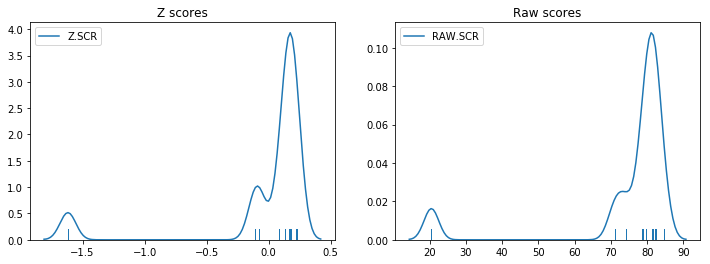

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,10,82.555358,0.228241,703,Huoshan_Translate.789,1101,0.900125,False,0.718604,False
1,0,84.596680,0.219925,743,OPPO.1360,1009,0.774470,False,1.453863,False
2,7,81.541309,0.178843,698,Tohoku-AIP-NTT.1442,1154,0.153733,False,0.353356,False
3,8,81.326332,0.178512,738,Online-A.1571,1078,0.148729,False,0.275924,False
4,11,81.544592,0.172393,755,Online-G.1553,1129,0.056276,False,0.354539,False
5,5,79.794218,0.170661,686,PROMT_NMT.77,1132,0.030109,False,0.275924,False
6,2,82.084666,0.166676,688,Online-B.1587,1027,0.030109,False,0.549067,False
7,12,78.508856,0.130646,734,UEDIN.1066,1113,0.574511,False,0.738896,False
8,1,78.810140,0.085328,715,Online-Z.1629,1069,1.259254,False,0.630377,False
9,3,74.178746,-0.079220,752,WMTBiomedBaseline.387,1207,3.745520,True,2.298548,False


iu-en ; 11 systems ; outliers_z: [] ; outliers_raw: []


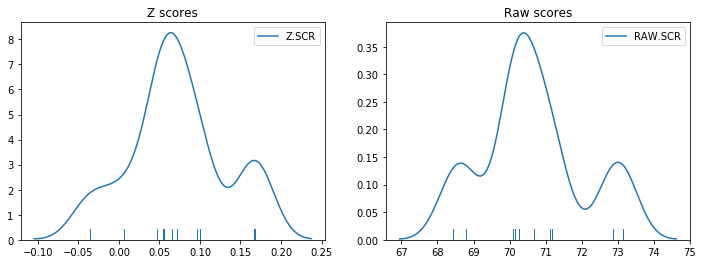

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,6,73.137097,0.168252,1085,NiuTrans.1206,1260,2.289537,False,2.260743,False
1,2,72.870599,0.167231,1136,Facebook_AI.729,1308,2.266663,False,2.051274,False
2,10,71.180543,0.099535,1123,CUNI-Transfer.375,1302,0.749741,False,0.722878,False
3,8,70.674739,0.096176,1053,Groningen.1301,1188,0.674491,False,0.325312,False
4,3,70.260860,0.071813,1128,SRPOL.385,1298,0.128556,False,0.000000,False
5,1,71.118983,0.066075,1101,Helsinki.994,1259,0.000000,False,0.674491,False
6,4,70.159981,0.055060,1072,NRC.985,1246,0.246836,False,0.079291,False
7,9,70.246999,0.054096,1083,UEDIN.1282,1246,0.268430,False,0.010895,False
8,5,70.105461,0.047074,1062,UQAM_TanLe.520,1224,0.425768,False,0.122144,False
9,7,68.784741,0.006139,1137,NICT_Kyoto.1220,1297,1.343043,False,1.160241,False


ja-en ; 10 systems ; outliers_z: ['Online-G.1564' 'Online-Z.1640'] ; outliers_raw: []


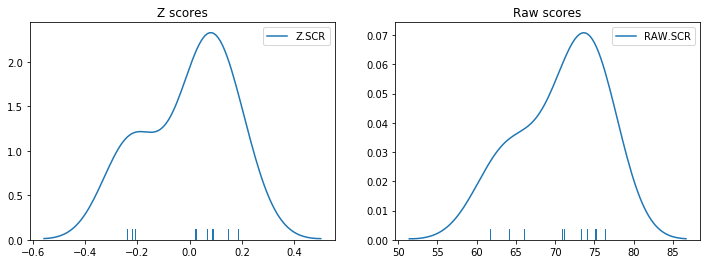

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,7,75.120023,0.184305,879,Tohoku-AIP-NTT.1429,1158,1.318581,False,0.668447,False
1,8,76.381033,0.146612,891,NiuTrans.1352,1133,0.956787,False,0.958711,False
2,1,74.082237,0.087792,912,OPPO.1529,1062,0.392194,False,0.429564,False
3,0,75.172539,0.084465,894,NICT_Kyoto.1230,1168,0.360266,False,0.680535,False
4,4,73.349654,0.068047,868,Online-B.1599,1083,0.202673,False,0.260935,False
5,6,70.864849,0.025817,862,Online-A.1581,1018,0.202673,False,0.311028,False
6,5,71.082471,0.019469,870,eTranslation.269,1068,0.263610,False,0.260935,False
7,2,64.128341,-0.208167,898,zlabs-nlp.66,1179,2.448592,False,1.861668,False
8,3,65.988612,-0.220500,944,Online-G.1564,1228,2.566968,True,1.433463,False
9,9,61.706616,-0.239511,922,Online-Z.1640,1137,2.749454,True,2.419112,False


pl-en ; 14 systems ; outliers_z: [] ; outliers_raw: []


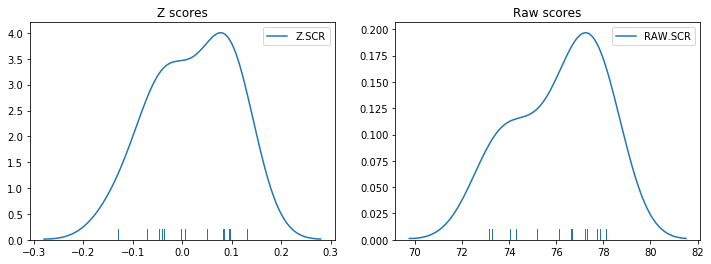

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,9,77.240801,0.131105,924,SRPOL.1506,1075,1.035214,False,0.306411,False
1,0,76.651235,0.096680,810,Online-G.1566,918,0.689589,False,0.010330,False
2,2,77.741784,0.095862,852,NICT-Rui.1492,982,0.681382,False,0.558005,False
3,5,77.863767,0.094489,868,Online-B.1601,1018,0.667599,False,0.619266,False
4,6,78.095570,0.085292,824,SJTU-NICT.331,1056,0.575257,False,0.735677,False
5,10,76.610097,0.083241,931,Online-A.1582,1035,0.554668,False,0.010330,False
6,7,75.177632,0.049811,836,OPPO.733,1004,0.219037,False,0.729716,False
7,3,77.305490,0.006178,847,Online-Z.1642,1005,0.219037,False,0.338898,False
8,4,78.123687,-0.003384,857,CUNI-Transformer.245,980,0.315045,False,0.749798,False
9,8,76.116474,-0.037510,777,NICT_Kyoto.1234,1040,0.657660,False,0.258228,False


ru-en ; 11 systems ; outliers_z: ['zlabs-nlp.1164'] ; outliers_raw: ['zlabs-nlp.1164']


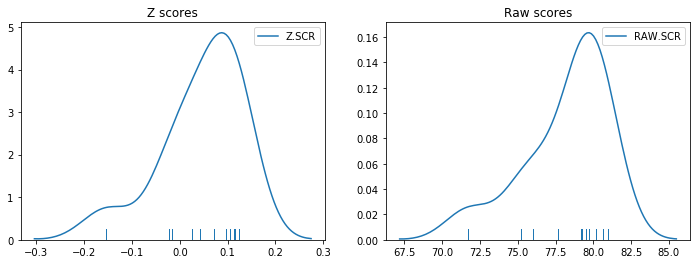

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,7,79.260353,0.123834,821,Online-G.1567,961,0.825864,False,0.000000,False
1,4,80.944934,0.114368,908,Online-A.1583,1113,0.674491,False,0.838972,False
2,0,79.731311,0.112572,923,OPPO.1094,1035,0.645783,False,0.234551,False
3,9,80.614671,0.103922,835,eTranslation.686,958,0.507463,False,0.674491,False
4,6,79.490876,0.095946,822,PROMT_NMT.78,985,0.379929,False,0.114807,False
5,5,80.151786,0.072186,896,Online-B.1603,1066,0.000000,False,0.443960,False
6,10,77.673275,0.042347,971,ariel197197.512,1141,0.477147,False,0.790413,False
7,8,79.165373,0.026118,966,AFRL.1083,1118,0.736647,False,0.047303,False
8,3,75.973881,-0.016211,938,DiDi_NLP.1191,1097,1.413508,False,1.636762,False
9,11,75.182256,-0.021620,882,Online-Z.1644,1087,1.499987,False,2.031015,False


ta-en ; 14 systems ; outliers_z: [] ; outliers_raw: ['TALP_UPC.192' 'Online-G.1568']


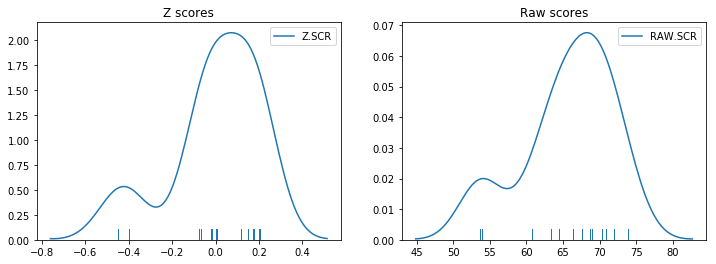

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,5,68.711720,0.203322,529,GTCOM.1409,641,1.041498,False,0.334430,False
1,8,70.345890,0.201887,438,OPPO.1364,497,1.034003,False,0.650215,False
2,2,68.921752,0.175799,508,Online-B.1604,594,0.897733,False,0.375016,False
3,13,73.858068,0.173192,502,Facebook_AI.1460,634,0.884114,False,1.328903,False
4,11,70.881404,0.149909,527,NiuTrans.1540,579,0.762498,False,0.753697,False
5,0,71.942474,0.116212,578,Huoshan_Translate.1431,696,0.586483,False,0.958737,False
6,7,64.478261,0.006822,506,Online-Z.1645,584,0.015092,False,0.483638,False
7,4,66.430431,0.001044,557,zlabs-nlp.1180,674,0.015092,False,0.106403,False
8,10,67.531696,-0.016395,631,Microsoft_STC_India.264,771,0.106179,False,0.106403,False
9,9,60.768701,-0.019634,508,UEDIN.384,618,0.123102,False,1.200469,False


zh-en ; 16 systems ; outliers_z: ['WMTBiomedBaseline.183'] ; outliers_raw: ['WMTBiomedBaseline.183']


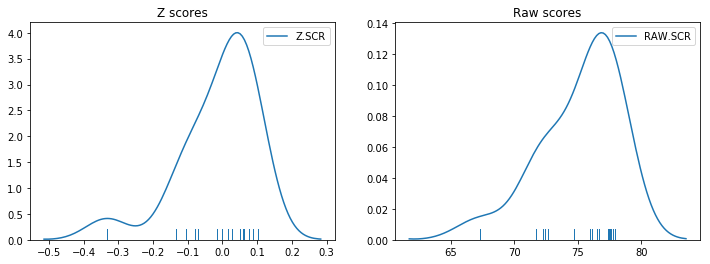

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,0,77.467851,0.101991,1703,Huoshan_Translate.919,1979,1.121139,False,0.563274,False
1,12,77.628485,0.088679,1650,DiDi_NLP.401,1964,0.934421,False,0.639929,False
2,13,77.353215,0.077207,1773,WeChat_AI.1525,2084,0.773496,False,0.508570,False
3,10,76.665049,0.063090,1648,Tencent_Translation.1249,1924,0.575485,False,0.180176,False
4,11,77.773337,0.060379,1714,Online-B.1605,2010,0.537460,False,0.709053,False
5,5,77.964223,0.050891,1712,DeepMind.381,2095,0.404367,False,0.800143,False
6,9,77.510440,0.050550,1820,OPPO.1422,2129,0.399587,False,0.583598,False
7,1,76.481024,0.027769,1660,THUNLP.1498,1917,0.080047,False,0.092360,False
8,2,75.986579,0.016356,1751,SJTU-NICT.320,2021,0.080047,False,0.143590,False
9,8,72.377028,-0.000323,1726,Huawei_TSC.889,2072,0.314004,False,1.866070,False


km-en ; 7 systems ; outliers_z: [] ; outliers_raw: []


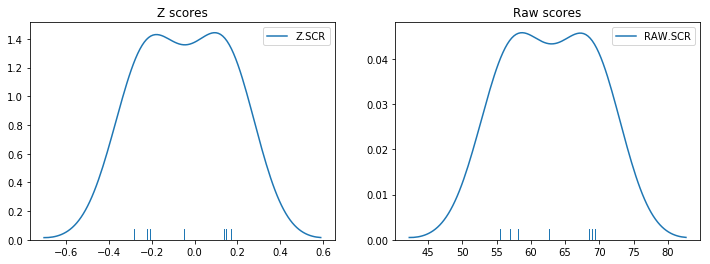

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,2,68.972888,0.168427,959,Online-B.1600,1146,0.792609,False,0.728015,False
1,3,69.428194,0.145762,947,GTCOM.1530,1114,0.709177,False,0.779910,False
2,1,68.503296,0.136340,986,Huawei_TSC.1539,1180,0.674491,False,0.674491,False
3,4,62.585630,-0.046887,907,Huoshan_Translate.651,1062,0.000000,False,0.000000,False
4,0,58.060703,-0.210070,939,OPPO.1054,1126,0.600708,False,0.515748,False
5,5,56.909917,-0.222419,963,Online-Z.1641,1150,0.646167,False,0.646913,False
6,6,55.470772,-0.281699,958,Online-G.1565,1166,0.864387,False,0.810946,False


ps-en ; 6 systems ; outliers_z: [] ; outliers_raw: []


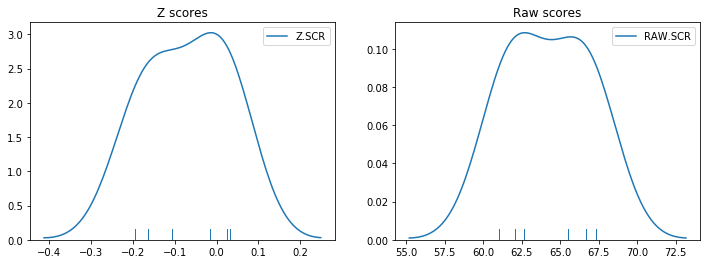

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,1,67.328488,0.031719,1204,Online-B.1602,1364,0.703465,False,0.949139,False
1,4,66.663614,0.024095,1201,GTCOM.1527,1380,0.645516,False,0.754153,False
2,5,65.518719,-0.016012,1202,Huawei_TSC.1533,1378,0.340651,False,0.418392,False
3,2,62.665407,-0.105642,1191,Huoshan_Translate.1470,1365,0.340651,False,0.418392,False
4,3,62.063784,-0.163801,1168,OPPO.966,1344,0.782730,False,0.594829,False
5,0,61.043942,-0.194662,1172,Online-Z.1643,1331,1.017318,False,0.893916,False


en-cs ; 12 systems ; outliers_z: ['zlabs-nlp.1151'] ; outliers_raw: ['Online-G.1555' 'zlabs-nlp.1151']


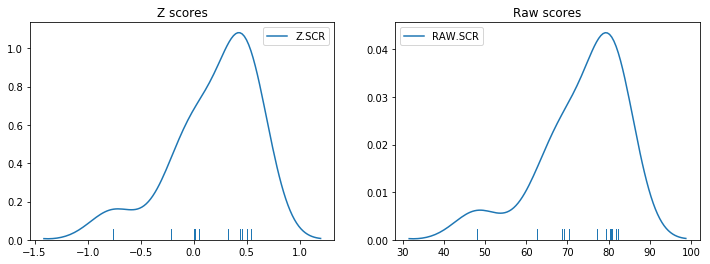

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,9,82.189971,0.546463,1130,CUNI-DocTransformer.1450,2621,0.691360,False,0.705258,False
1,12,81.842105,0.538236,1197,OPPO.1121,2684,0.657621,False,0.643723,False
2,3,80.777384,0.505331,1255,SRPOL.522,3221,0.522677,False,0.455380,False
3,6,80.452223,0.458348,1237,CUNI-T2T-2018.1071,3036,0.330001,False,0.397860,False
4,11,80.354506,0.440995,1154,eTranslation.1048,2753,0.258838,False,0.380575,False
5,7,79.314421,0.433838,1217,CUNI-Transformer.1080,2911,0.229485,False,0.196589,False
6,5,77.091747,0.321921,1240,UEDIN-CUNI.1482,2893,0.229485,False,0.196589,False
7,0,70.460268,0.048170,1094,Online-B.1589,2681,1.352134,False,1.369662,False
8,2,69.092732,0.017379,1275,Online-Z.1630,3155,1.478406,False,1.611572,False
9,4,68.719823,0.007919,1262,Online-A.1573,2972,1.517201,False,1.677537,False


en-de ; 14 systems ; outliers_z: ['zlabs-nlp.179' 'WMTBiomedBaseline.388'] ; outliers_raw: ['zlabs-nlp.179' 'WMTBiomedBaseline.388']


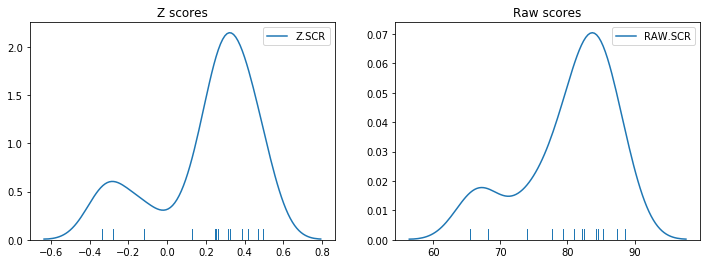

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,6,87.398679,0.495152,694,OPPO.1535,1190,1.231894,False,1.147129,False
1,4,88.620073,0.468209,734,Tohoku-AIP-NTT.890,1361,1.073232,False,1.423888,False
2,9,84.506150,0.416468,813,Online-B.1590,1365,0.768546,False,0.491705,False
3,3,84.313452,0.384524,700,Tencent_Translation.1520,1056,0.580435,False,0.448041,False
4,15,84.603499,0.326443,605,Huoshan_Translate.832,1091,0.238406,False,0.513763,False
5,2,85.279324,0.322221,715,Online-A.1574,1308,0.213548,False,0.666900,False
6,1,82.451056,0.311777,710,eTranslation.737,1173,0.152041,False,0.026036,False
7,7,82.221249,0.260139,771,AFRL.1069,1356,0.152041,False,0.026036,False
8,12,81.002671,0.251232,649,UEDIN.1136,1192,0.204493,False,0.302157,False
9,0,79.325980,0.247014,782,PROMT_NMT.73,1241,0.229328,False,0.682082,False


en-iu ; 11 systems ; outliers_z: ['UQAM_TanLe.521' 'UEDIN.1281' 'OPPO.722'] ; outliers_raw: ['OPPO.722']


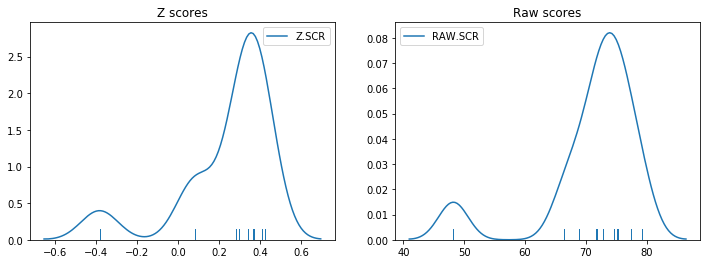

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,9,75.260070,0.425378,859,MultiLingual_Engine_Ubiqus.525,1569,1.002851,False,0.674491,False
1,3,77.414732,0.408616,913,CUNI-Transfer.1009,1677,0.807203,False,1.254635,False
2,0,71.873492,0.369373,923,NRC.715,1643,0.349148,False,0.237347,False
3,1,74.567084,0.368368,918,Facebook_AI.1465,1555,0.337414,False,0.487904,False
4,10,79.217838,0.363624,811,NICT_Kyoto.1219,1191,0.282040,False,1.740122,False
5,5,71.597169,0.339461,983,Groningen.1392,2052,0.000000,False,0.311748,False
6,7,75.174515,0.296468,945,Helsinki.992,1748,0.501821,False,0.651455,False
7,6,72.755003,0.281675,976,SRPOL.383,1683,0.674491,False,0.000000,False
8,2,68.893587,0.083866,803,UQAM_TanLe.521,1546,2.983360,True,1.039689,False
9,4,66.401866,0.081498,813,UEDIN.1281,1687,3.011005,True,1.710586,False


en-ja ; 11 systems ; outliers_z: [] ; outliers_raw: ['Online-G.1557']


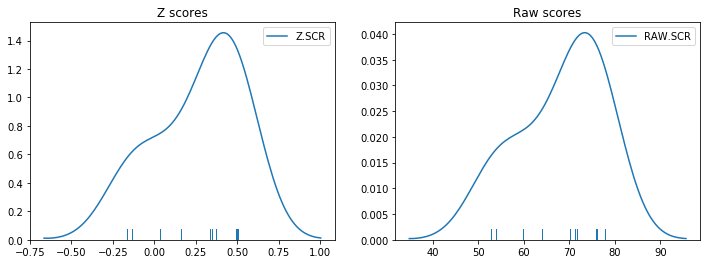

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,2,77.738883,0.502427,907,NiuTrans.1347,2037,0.702505,False,0.912815,False
1,5,76.053549,0.496301,972,Tohoku-AIP-NTT.1453,2309,0.674491,False,0.674491,False
2,4,75.763241,0.496028,832,OPPO.1201,1938,0.673246,False,0.633438,False
3,10,75.914355,0.491576,894,ENMT.1477,2149,0.652887,False,0.654807,False
4,7,71.770788,0.374515,833,NICT_Kyoto.1223,2128,0.117636,False,0.068862,False
5,9,71.283822,0.348788,887,Online-A.1575,2338,0.000000,False,0.000000,False
6,6,70.234717,0.334996,855,Online-B.1591,2203,0.063064,False,0.148355,False
7,1,63.935533,0.159081,841,zlabs-nlp.95,2045,0.867423,False,1.039127,False
8,3,59.793134,0.032173,886,Online-Z.1632,2037,1.447703,False,1.624907,False
9,0,53.944009,-0.131884,829,SJTU-NICT.370,1880,2.197843,False,2.452036,False


en-pl ; 14 systems ; outliers_z: ['zlabs-nlp.180' 'Online-Z.1634'] ; outliers_raw: ['zlabs-nlp.180']


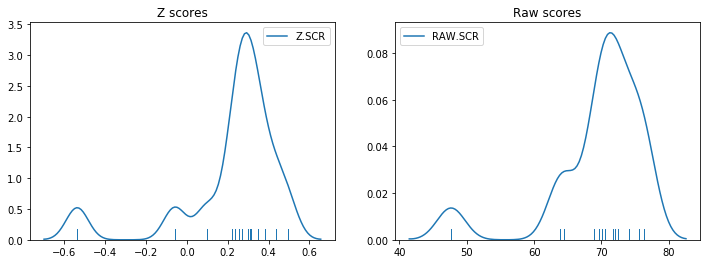

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,8,76.353586,0.492952,790,SRPOL.1325,1333,2.161875,False,1.379212,False
1,10,75.639329,0.434658,770,eTranslation.926,1306,1.553864,False,1.189004,False
2,4,76.305796,0.382802,785,Huoshan_Translate.1137,1493,1.012991,False,1.366485,False
3,3,74.032907,0.348356,665,Tilde.1425,1191,0.653712,False,0.761211,False
4,9,70.591942,0.316126,757,Online-G.1559,1395,0.317556,False,0.155125,False
5,7,72.030325,0.310253,687,OPPO.1076,1424,0.256296,False,0.227919,False
6,2,72.410711,0.299231,792,NICT_Kyoto.1233,1607,0.141334,False,0.329217,False
7,0,69.713373,0.272130,764,Tilde.1430,1328,0.141334,False,0.389090,False
8,1,71.756972,0.254796,796,CUNI-Transformer.978,1274,0.322129,False,0.155125,False
9,11,70.055412,0.236072,813,Online-B.1593,1480,0.517426,False,0.298004,False


en-ru ; 9 systems ; outliers_z: [] ; outliers_raw: []


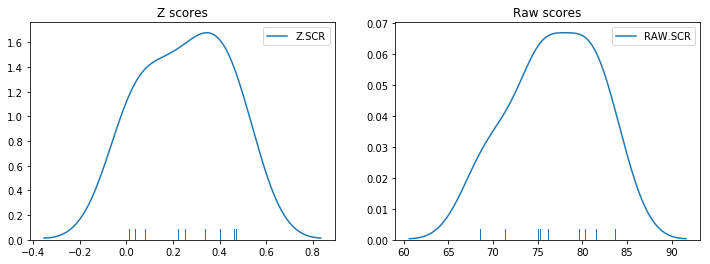

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,9,81.543196,0.469048,1161,Online-G.1560,2185,0.856094,False,0.879131,False
1,3,83.697166,0.461176,1082,OPPO.1489,1980,0.825045,False,1.232267,False
2,7,79.608306,0.404210,1242,ariel197197.1373,2139,0.600347,False,0.561912,False
3,5,80.294986,0.336000,1303,Online-B.1595,2162,0.331301,False,0.674491,False
4,4,75.091536,0.252006,1274,PROMT_NMT.374,2264,0.000000,False,0.178598,False
5,8,76.180901,0.222342,1350,DiDi_NLP.1455,2512,0.117010,False,0.000000,False
6,6,75.306760,0.081006,1208,Online-A.1577,2342,0.674491,False,0.143313,False
7,0,71.323305,0.035403,1313,zlabs-nlp.169,2385,0.854367,False,0.796387,False
8,1,68.537027,0.011678,1295,Online-Z.1636,2305,0.947946,False,1.253188,False


en-ta ; 15 systems ; outliers_z: ['SJTU-NICT.386' 'TALP_UPC.1049' 'Online-G.1561'] ; outliers_raw: ['SJTU-NICT.386' 'Online-G.1561']


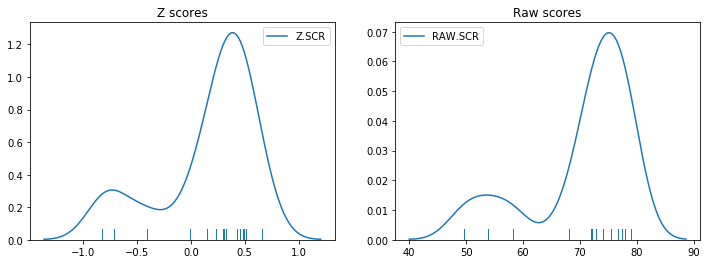

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,1,79.012587,0.662632,384,Facebook_AI.1393,506,1.391387,False,0.927917,False
1,2,75.499162,0.513687,398,GTCOM.1389,538,0.808041,False,0.405366,False
2,14,77.308648,0.491168,476,Online-B.1596,583,0.719847,False,0.674491,False
3,6,77.371349,0.479587,662,OPPO.1510,813,0.674491,False,0.683816,False
4,12,77.958611,0.457114,600,Online-A.1578,728,0.586472,False,0.771160,False
5,10,76.704819,0.423977,498,Huoshan_Translate.839,552,0.456692,False,0.584683,False
6,3,72.773642,0.325950,497,Online-Z.1637,620,0.072767,False,0.000000,False
7,0,72.739391,0.307370,542,zlabs-nlp.1181,753,0.000000,False,0.005094,False
8,11,72.175269,0.296469,465,Microsoft_STC_India.282,508,0.042695,False,0.088996,False
9,8,74.059642,0.231115,503,UEDIN.488,595,0.298656,False,0.191267,False


en-zh ; 12 systems ; outliers_z: [] ; outliers_raw: []


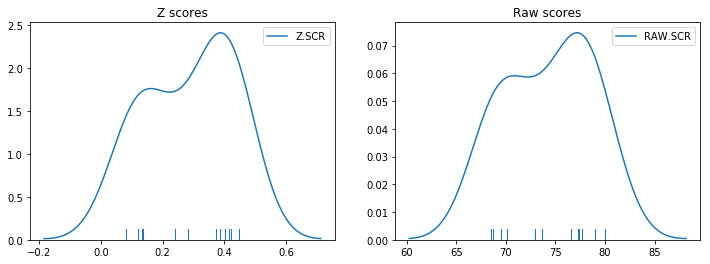

,index,RAW.SCR,Z.SCR,N,SYS,N.ALL,rescaled_z,OUTLIER_z,rescaled_raw,OUTLIER_raw
0,9,79.967496,0.446602,1203,OPPO.1147,2816,0.891540,False,1.015958,False
1,2,79.007680,0.420323,1269,Tencent_Translation.1332,3295,0.694567,False,0.814073,False
2,6,77.332852,0.414967,1270,Huawei_TSC.618,3612,0.654414,False,0.461794,False
3,3,77.427893,0.403726,1201,NiuTrans.1511,3389,0.570159,False,0.481785,False
4,10,77.680459,0.386709,1234,SJTU-NICT.706,3539,0.442608,False,0.534909,False
5,8,76.578148,0.372876,1253,Huoshan_Translate.716,3368,0.338926,False,0.303052,False
6,0,73.696566,0.282441,1269,Online-B.1597,3421,0.338926,False,0.303052,False
7,7,72.967923,0.241173,1252,Online-A.1579,3371,0.648253,False,0.456313,False
8,1,69.506208,0.135785,1286,dong-nmt.768,3581,1.438187,False,1.184440,False
9,5,68.469477,0.134655,1249,Online-Z.1638,3304,1.446652,False,1.402503,False


In [8]:
# SYS SCORES 


langs=['cs', 'de','iu', 'ja','pl','ru','ta','zh']    
ALL_LPS = [f'{l}-en' for l in langs]
ALL_LPS.extend( ['km-en','ps-en'])
ALL_LPS.extend( [f'en-{l}' for l in langs])

INPUTDIR = '../manual-evaluation/DA'

highest_raw_scores = {}

num_sys = {}
outliers = {}
for lp in ALL_LPS:
    human_scores = pd.read_csv(f'{INPUTDIR}/ad-sys-scores-{lp}.csv', sep=' ')
     
    ########### housekeeping ################

      #inconsistencies between system name in the filenames and human evaluation. 
      #         We update system names in human eval  
    if lp=='iu-en':
        human_scores=human_scores.replace(['NICT-Kyoto.1220', 'UQAM-TanLe.520', 'Facebook-AI.729'],
                                     ['NICT_Kyoto.1220', 'UQAM_TanLe.520', 'Facebook_AI.729'])
    if lp=='ps-en':
        human_scores=human_scores.replace(['Huoshan-Translate.1470', 'Huawei-TSC.1533' ],
                                     ['Huoshan_Translate.1470', 'Huawei_TSC.1533' ])
    if lp=='km-en':
        human_scores=human_scores.replace(['Huawei-TSC.1539' , 'Huoshan-Translate.651'],
                                     ['Huawei_TSC.1539', 'Huoshan_Translate.651'])
                
    if lp=='en-iu':
        human_scores=human_scores[human_scores.SYS != 'zlabs-nlp.49']
        
    del human_scores['Unnamed: 5']        
    
    human_scores=human_scores.replace(['HUMAN' ],
                                     ['Human-A.0' ])
    
    #renaming HUMAN-A, HUMAN-B and HUMAN-C to be consistent with the system names in metrics inputs
    human_scores=human_scores.replace(['HUMAN-A' ],
                                     ['Human-A.0' ])
    
    human_scores=human_scores.replace(['HUMAN-B' ],
                                     ['Human-B.0' ])

    human_scores=human_scores.replace(['HUMAN-C' ],
                                     ['Human-P.0' ])    
    
    
    #for to-en lps, human translation evaluated in the human eval is the newstestB2020 reference;
    # which we named as Human-B.0 in the metrics inputs
    human_scores=human_scores.replace(['HUMAN.0' ],
                                     ['Human-B.0' ])

    ########### end housekeeping ################

    #save updated human scores
    human_scores.to_csv(f'{INPUTDIR}/metrics-ad-sys-scores-{lp}.csv', sep=' ', index=False)
    human_scores = human_scores[~human_scores.SYS.str.startswith('Human')]
    THRESHOLD = 2.5
    human_scores['rescaled_z'] = rescale(human_scores['Z.SCR'], THRESHOLD)
    human_scores['OUTLIER_z'] =  human_scores['rescaled_z'] > THRESHOLD 
    human_scores['rescaled_raw'] = rescale(human_scores['RAW.SCR'], THRESHOLD)
    human_scores['OUTLIER_raw'] =  human_scores['rescaled_raw'] > THRESHOLD 
    num_sys[lp] = len(human_scores) 
    outliers[lp] = set(human_scores[human_scores.OUTLIER_z].SYS.unique())
        
    print(lp, ';', len(human_scores), 'systems', '; outliers_z:', human_scores[human_scores.OUTLIER_z].SYS.values, '; outliers_raw:', human_scores[human_scores.OUTLIER_raw].SYS.values)
    
    nohuman = human_scores[~human_scores.SYS.str.startswith('Human')]
    highest_raw_scores[lp] = nohuman['RAW.SCR'].max()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    ax1.set_title('Z scores')
    sns.kdeplot(ax=ax1, data = human_scores['Z.SCR'])
    sns.rugplot(ax=ax1 , a =human_scores['Z.SCR'])
    ax2.set_title('Raw scores')
    sns.kdeplot(ax=ax2, data = human_scores['RAW.SCR'])
    sns.rugplot(ax=ax2 , a =human_scores['RAW.SCR']) 
    plt.show()
    display(human_scores.sort_values('Z.SCR', ascending=False).reset_index())
 

In [6]:

outliers

{'cs-en': set(),
 'de-en': {'WMTBiomedBaseline.387', 'yolo.1052', 'zlabs-nlp.1153'},
 'iu-en': set(),
 'ja-en': {'Online-G.1564', 'Online-Z.1640'},
 'pl-en': set(),
 'ru-en': {'zlabs-nlp.1164'},
 'ta-en': set(),
 'zh-en': {'WMTBiomedBaseline.183'},
 'km-en': set(),
 'ps-en': set(),
 'en-cs': {'zlabs-nlp.1151'},
 'en-de': {'WMTBiomedBaseline.388', 'zlabs-nlp.179'},
 'en-iu': {'OPPO.722', 'UEDIN.1281', 'UQAM_TanLe.521'},
 'en-ja': set(),
 'en-pl': {'Online-Z.1634', 'zlabs-nlp.180'},
 'en-ru': set(),
 'en-ta': {'Online-G.1561', 'SJTU-NICT.386', 'TALP_UPC.1049'},
 'en-zh': set()}

In [9]:
#manually update outliers and pickle

import pickle

outliers_dict = {'cs-en': {'CUNI-DocTransformer.1457', 'zlabs-nlp.1149'},
 'de-en': {'WMTBiomedBaseline.387', 'yolo.1052', 'zlabs-nlp.1153'},
 'iu-en': {'Facebook_AI.729', 'NiuTrans.1206'},
 'ja-en': {'Online-G.1564', 'Online-Z.1640', 'zlabs-nlp.66'},
 'pl-en': {'zlabs-nlp.1162'},
 'ru-en': {'zlabs-nlp.1164'},
 'ta-en': {'Online-G.1568', 'TALP_UPC.192'},
 'zh-en': {'WMTBiomedBaseline.183'},
 'km-en': set(),
 'ps-en': set(),
 'en-cs': {'Online-G.1555', 'zlabs-nlp.1151'},
 'en-de': {'WMTBiomedBaseline.388', 'zlabs-nlp.179', 'Online-G.1556'},
 'en-iu_news': {'OPPO.722', 'UEDIN.1281', 'UQAM_TanLe.521'},
 'en-iu_full': {'OPPO.722', 'UEDIN.1281', 'UQAM_TanLe.521'}, 
 'en-iu': {'OPPO.722', 'UEDIN.1281', 'UQAM_TanLe.521'},
 'en-ja': set(),
 'en-pl': {'Online-A.1576', 'Online-Z.1634', 'zlabs-nlp.180'},
 'en-ru': set(),
 'en-ta': {'Online-G.1561', 'SJTU-NICT.386', 'TALP_UPC.1049'},
 'en-zh': set()}
import pickle
pickle.dump(outliers_dict, open('../manual-evaluation/outlier-systems-dict.pk', 'wb'))
